# Data Preprocessing 

In [244]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn import metrics
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [245]:
# Read Covid Confirmed Cases data from CSV
confirm = pd.read_csv(r"C:\Users\USER\Desktop\Covid-19 Data set\time_series_covid19_confirmed_global.csv")

In [246]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275


In [247]:
confirm.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/9/22', '1/10/22', '1/11/22', '1/12/22', '1/13/22', '1/14/22',
       '1/15/22', '1/16/22', '1/17/22', '1/18/22'],
      dtype='object', length=732)

In [248]:
# Reshaping Data Sets
dates = confirm.columns[4:]

In [249]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '1/9/22', '1/10/22', '1/11/22', '1/12/22', '1/13/22', '1/14/22',
       '1/15/22', '1/16/22', '1/17/22', '1/18/22'],
      dtype='object', length=728)

In [250]:
# unpivoted DataFrame from wide format to long format
confirm_df_long = confirm.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)

In [251]:
confirm_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
203835,NaN,Vietnam,14.058324,108.277199,1/18/22,2062128
203836,NaN,West Bank and Gaza,31.952200,35.233200,1/18/22,477151
203837,NaN,Yemen,15.552727,48.516388,1/18/22,10408
203838,NaN,Zambia,-13.133897,27.849332,1/18/22,298032


In [252]:
# Convert String Date Time Into Python Date Time Object.
confirm_df_long['Date'] = pd.to_datetime(confirm_df_long['Date'])

In [253]:
confirm_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0
...,...,...,...,...,...,...
203835,NaN,Vietnam,14.058324,108.277199,2022-01-18,2062128
203836,NaN,West Bank and Gaza,31.952200,35.233200,2022-01-18,477151
203837,NaN,Yemen,15.552727,48.516388,2022-01-18,10408
203838,NaN,Zambia,-13.133897,27.849332,2022-01-18,298032


In [254]:
confirm_df_long.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
dtype: object

In [255]:
confirm_df_long.drop(["Province/State", "Lat","Long"], axis = 1, inplace = True)

In [256]:
confirm_df_long

,Country/Region,Date,Confirmed
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
203835,Vietnam,2022-01-18,2062128
203836,West Bank and Gaza,2022-01-18,477151
203837,Yemen,2022-01-18,10408
203838,Zambia,2022-01-18,298032


In [257]:
# Accessed Bangladesh Confirmed_cases data by Label(s)
Bangladesh_confirmed_cases = confirm_df_long.set_index("Country/Region")
df_confirmed_cases = Bangladesh_confirmed_cases.loc['Bangladesh', 'Date':'Confirmed']

In [258]:
df_confirmed_cases

,Date,Confirmed
Country/Region,,
Bangladesh,2020-01-22,0
Bangladesh,2020-01-23,0
Bangladesh,2020-01-24,0
Bangladesh,2020-01-25,0
Bangladesh,2020-01-26,0
...,...,...
Bangladesh,2022-01-14,1609042
Bangladesh,2022-01-15,1612489
Bangladesh,2022-01-16,1617711


In [259]:
df_confirmed_cases = (df_confirmed_cases.assign(new_cases = df_confirmed_cases.Confirmed.diff()))

In [260]:
df_confirmed_cases

,Date,Confirmed,new_cases
Country/Region,,,
Bangladesh,2020-01-22,0,NaN
Bangladesh,2020-01-23,0,0.0
Bangladesh,2020-01-24,0,0.0
Bangladesh,2020-01-25,0,0.0
Bangladesh,2020-01-26,0,0.0
...,...,...,...
Bangladesh,2022-01-14,1609042,4378.0
Bangladesh,2022-01-15,1612489,3447.0
Bangladesh,2022-01-16,1617711,5222.0


In [261]:
df_confirmed_cases.isna().sum()

Date         0
Confirmed    0
new_cases    1
dtype: int64

In [262]:
# filling na with 0
df_confirmed_cases = df_confirmed_cases.fillna(0)

In [263]:
df_confirmed_cases

,Date,Confirmed,new_cases
Country/Region,,,
Bangladesh,2020-01-22,0,0.0
Bangladesh,2020-01-23,0,0.0
Bangladesh,2020-01-24,0,0.0
Bangladesh,2020-01-25,0,0.0
Bangladesh,2020-01-26,0,0.0
...,...,...,...
Bangladesh,2022-01-14,1609042,4378.0
Bangladesh,2022-01-15,1612489,3447.0
Bangladesh,2022-01-16,1617711,5222.0


In [264]:
first_60_days_forcasting_dataset = df_confirmed_cases.loc[(df_confirmed_cases['Date'] >= '2021-05-08')
                     & (df_confirmed_cases['Date'] < '2021-07-7')]

In [265]:
first_60_days_forcasting_dataset['Day'] = np.arange(len(first_60_days_forcasting_dataset.index))
first_60_days_dataset = first_60_days_forcasting_dataset.set_index("Date")

In [266]:
first_60_days_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2021-05-08 to 2021-07-06
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  60 non-null     int64  
 1   new_cases  60 non-null     float64
 2   Day        60 non-null     int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 1.6 KB


# Short term Future Forcasting Using ML

In [267]:
first_60_days_dataset.head()

,Confirmed,new_cases,Day
Date,,,
2021-05-08,772127,1285.0,0
2021-05-09,773513,1386.0,1
2021-05-10,775027,1514.0,2
2021-05-11,776257,1230.0,3
2021-05-12,777397,1140.0,4


In [268]:
X= first_60_days_dataset['Day']
y= first_60_days_dataset['new_cases']
x_prediction = [[61],[62],[63],[64],[65],[66],[67]]

In [269]:
X

Date
2021-05-08     0
2021-05-09     1
2021-05-10     2
2021-05-11     3
2021-05-12     4
2021-05-13     5
2021-05-14     6
2021-05-15     7
2021-05-16     8
2021-05-17     9
2021-05-18    10
2021-05-19    11
2021-05-20    12
2021-05-21    13
2021-05-22    14
2021-05-23    15
2021-05-24    16
2021-05-25    17
2021-05-26    18
2021-05-27    19
2021-05-28    20
2021-05-29    21
2021-05-30    22
2021-05-31    23
2021-06-01    24
2021-06-02    25
2021-06-03    26
2021-06-04    27
2021-06-05    28
2021-06-06    29
2021-06-07    30
2021-06-08    31
2021-06-09    32
2021-06-10    33
2021-06-11    34
2021-06-12    35
2021-06-13    36
2021-06-14    37
2021-06-15    38
2021-06-16    39
2021-06-17    40
2021-06-18    41
2021-06-19    42
2021-06-20    43
2021-06-21    44
2021-06-22    45
2021-06-23    46
2021-06-24    47
2021-06-25    48
2021-06-26    49
2021-06-27    50
2021-06-28    51
2021-06-29    52
2021-06-30    53
2021-07-01    54
2021-07-02    55
2021-07-03    56
2021-07-04    57
2021-07-0

In [270]:
y

Date
2021-05-08     1285.0
2021-05-09     1386.0
2021-05-10     1514.0
2021-05-11     1230.0
2021-05-12     1140.0
2021-05-13     1290.0
2021-05-14      848.0
2021-05-15      261.0
2021-05-16      363.0
2021-05-17      698.0
2021-05-18     1272.0
2021-05-19     1608.0
2021-05-20     1457.0
2021-05-21     1504.0
2021-05-22     1028.0
2021-05-23     1354.0
2021-05-24     1441.0
2021-05-25     1675.0
2021-05-26     1497.0
2021-05-27     1292.0
2021-05-28     1358.0
2021-05-29     1043.0
2021-05-30     1444.0
2021-05-31     1710.0
2021-06-01     1765.0
2021-06-02     1988.0
2021-06-03     1687.0
2021-06-04     1887.0
2021-06-05     1447.0
2021-06-06     1676.0
2021-06-07     1970.0
2021-06-08     2322.0
2021-06-09     2537.0
2021-06-10     2576.0
2021-06-11     2454.0
2021-06-12     1637.0
2021-06-13     2436.0
2021-06-14     3050.0
2021-06-15     3319.0
2021-06-16     3956.0
2021-06-17     3840.0
2021-06-18     3883.0
2021-06-19     3057.0
2021-06-20     3641.0
2021-06-21     4636.0
2021-

Mean Absolute Error: 936.6088775506954
Mean Squared Error: 1320050.687686897
Root Mean Squared Error: 1148.934588080147
R2 Score: 0.8144281216915343
R2 Score in percent: 81.44281216915343 %


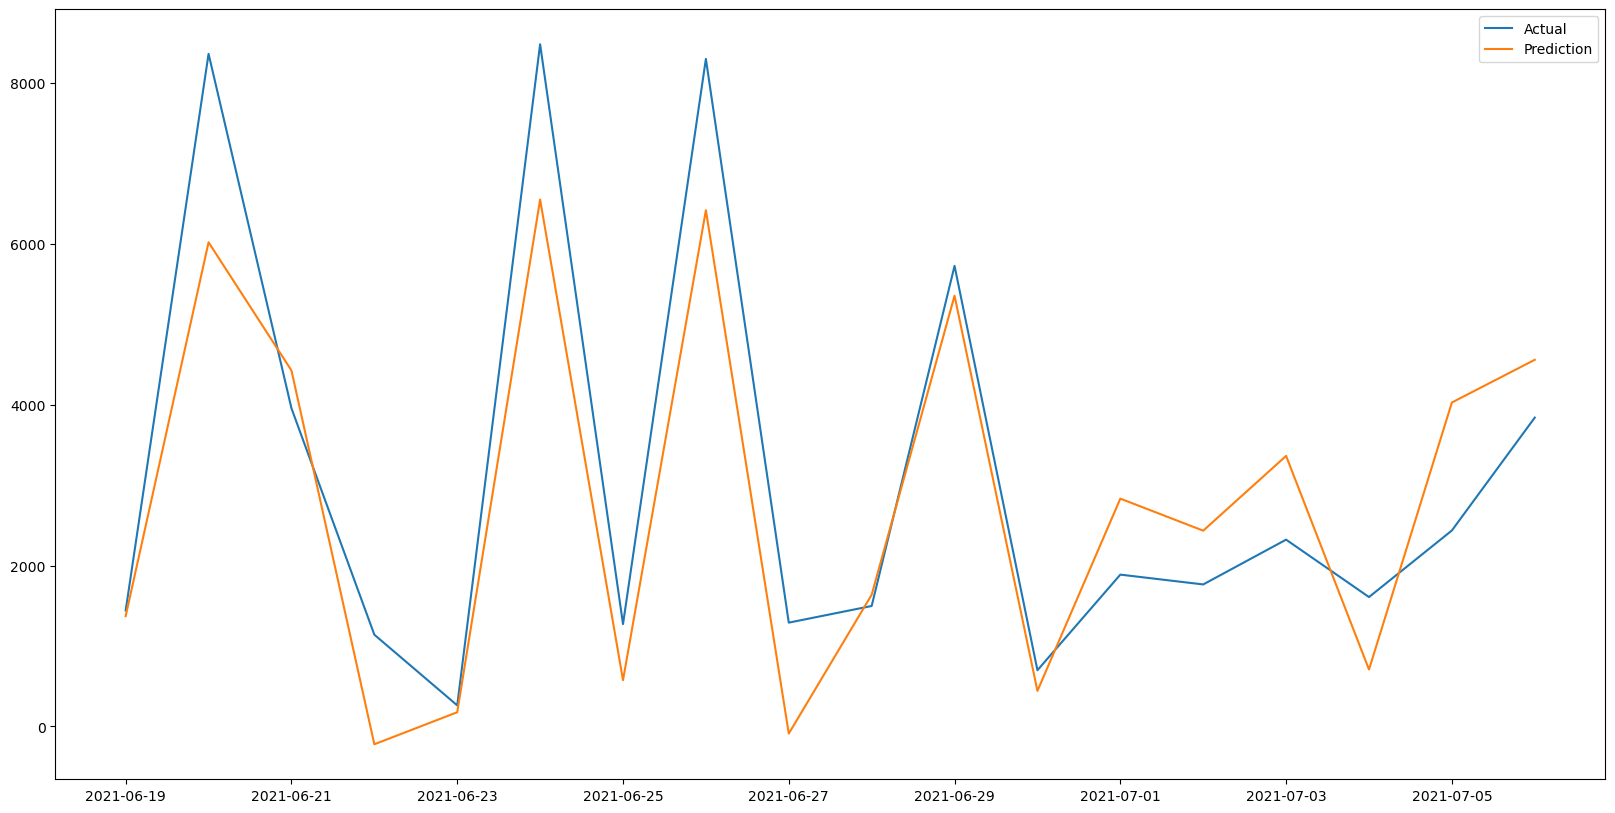

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=58)

regressor = LinearRegression()

regressor.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_pred = regressor.predict(np.array(X_test).reshape(-1,1))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.plot(first_60_days_dataset.index[-len(y_pred):], y_test, label='Actual')
plt.plot(first_60_days_dataset.index[-len(y_pred):], y_pred, label='Prediction')

r2_score = regressor.score(np.array(X_test).reshape(-1,1),y_test)

print('R2 Score:',r2_score)
print('R2 Score in percent:',r2_score*100,'%')

plt.legend(loc=1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()


In [272]:
X = np.array(X_train).reshape(-1,1)
y = np.array(y_train).reshape(-1,1)
cv_score = cross_val_score(regressor, X,y,cv=10)

In [273]:
cv_score

array([  0.73836148,   0.84357606,   0.61020891,   0.49965636,
        -1.86432397,   0.60390338,  -1.81400752,   0.62213481,
         0.62410916, -14.52887506])

In [274]:
print('Evaluation for expecting 7 days in future in Linear Regression:')
for predict in x_prediction:
  print('day',predict,'=',int(regressor.predict([predict])))

Evaluation for expecting 7 days in future in Linear Regression:
day [61] = 7348
day [62] = 7481
day [63] = 7614
day [64] = 7747
day [65] = 7879
day [66] = 8012
day [67] = 8145


In [275]:
pred_dataset = df_confirmed_cases.loc[(df_confirmed_cases['Date'] >= '2021-5-08')
                     & (df_confirmed_cases['Date'] < '2021-07-14')]

In [276]:
pred_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Bangladesh to Bangladesh
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       67 non-null     datetime64[ns]
 1   Confirmed  67 non-null     int64         
 2   new_cases  67 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1+ KB


In [277]:
pred_dataset['Day'] = np.arange(len(pred_dataset.index))
pred_dataset = pred_dataset.set_index("Date")
pred_dataset.drop(["Confirmed"], axis = 1, inplace = True)

In [278]:
pred = pred_dataset ['Day']
ac = pred_dataset['new_cases']
yp = regressor.predict(np.array(pred).reshape(-1,1))

In [279]:
ac

Date
2021-05-08     1285.0
2021-05-09     1386.0
2021-05-10     1514.0
2021-05-11     1230.0
2021-05-12     1140.0
               ...   
2021-07-09    11324.0
2021-07-10     8772.0
2021-07-11    11874.0
2021-07-12    13768.0
2021-07-13    12198.0
Name: new_cases, Length: 67, dtype: float64

In [280]:
ac_X= first_60_days_dataset['Day']
ac_y= first_60_days_dataset['new_cases']

In [281]:
ac_X.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 60 entries, 2021-05-08 to 2021-07-06
Series name: Day
Non-Null Count  Dtype
--------------  -----
60 non-null     int32
dtypes: int32(1)
memory usage: 720.0 bytes


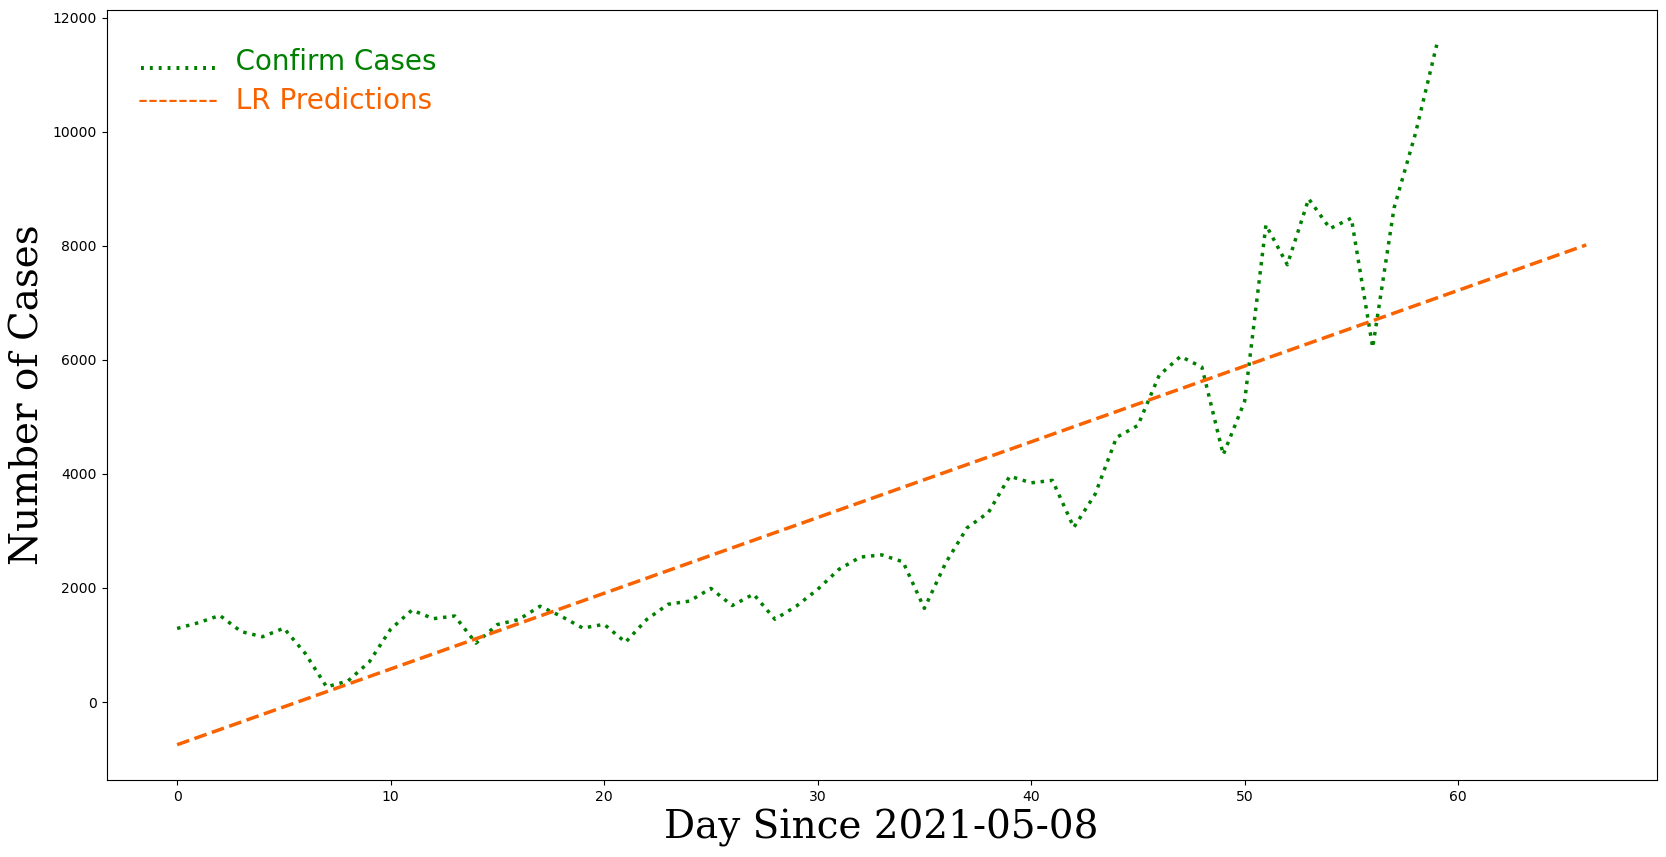

In [282]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(ac_X,ac_y,color='g', linestyle = 'dotted', linewidth = '2.5')
plt.plot(pred, yp, color='#f86300', linestyle = 'dashed', linewidth = '2.5')
font1 = {'family':'serif','color':'black','size':28}
plt.xlabel("Day Since 2021-05-08", fontdict = font1)
plt.ylabel("Number of Cases", fontdict = font1)
ax.text(0.02, 0.95, '.........  Confirm Cases',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='green', fontsize=20)
ax.text(0.02, 0.90, '--------  LR Predictions',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='#f86300', fontsize=20)
plt.show() 